# * Beginner Level Task 2 *
Stock Market Prediction And Forecasting Using Stacked LSTM

Tutorial: https://www.youtube.com/watch?v=H6du_pfuznE

In [1]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Loading Stock Market Prediction data 

In [2]:
dataset =pd.read_csv('Stock.csv')
dataset.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


# Summarize the Dataset

In [3]:
dataset.shape

(2035, 8)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df1=dataset.reset_index()['High']

In [8]:
df1.shape

(2035,)

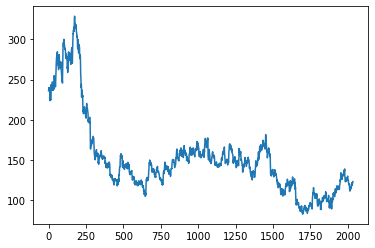

In [9]:
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) 

In [11]:
df1

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [12]:
df1.shape

(2035, 1)

# Train and Test Split

In [13]:
train_size = int (len(df1)*0.8)   # taking 80 % data as training data
test_size = len(df1)-train_size     # rest 20 % as testing data

train_data = df1[0:train_size,:]
test_data = df1[train_size:len(df1),:1]

In [14]:
train_size, test_size

(1628, 407)

In [15]:
train_data

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.14210205],
       [0.15125025],
       [0.15145355]])

In [16]:
test_data

array([[0.15734905],
       [0.16873348],
       [0.1774751 ],
       [0.18702988],
       [0.16039845],
       [0.15206343],
       [0.1589754 ],
       [0.16263468],
       [0.15978857],
       [0.16324456],
       [0.16283798],
       [0.16588738],
       [0.16182151],
       [0.16263468],
       [0.1652775 ],
       [0.17056312],
       [0.1772718 ],
       [0.14718439],
       [0.14108559],
       [0.16060175],
       [0.15328319],
       [0.12421224],
       [0.13498679],
       [0.10591584],
       [0.07074609],
       [0.06566375],
       [0.05448262],
       [0.0459443 ],
       [0.04513112],
       [0.05448262],
       [0.05407603],
       [0.05976825],
       [0.07318561],
       [0.06668022],
       [0.05570238],
       [0.04797723],
       [0.05122992],
       [0.0487904 ],
       [0.04940028],
       [0.04614759],
       [0.04838382],
       [0.05122992],
       [0.05773531],
       [0.0487904 ],
       [0.03699939],
       [0.03598292],
       [0.03252694],
       [0.027

In [17]:
train_data.shape, test_data.shape

((1628, 1), (407, 1))

# Timesteps

In [18]:
#convert an array of values into a dataset matrix
def create_data(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = (dataset[i:(i+time_step), 0])
        dataX.append(a)
        b = (dataset[i + time_step, 0])
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [19]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4

time_step = 300

X_train, Y_train = create_data(train_data, time_step)
X_test, Y_test = create_data(test_data, time_step)

In [20]:
X_train,X_test

(array([[0.62268754, 0.62614353, 0.6391543 , ..., 0.38463102, 0.38991665,
         0.39235617],
        [0.62614353, 0.6391543 , 0.62594023, ..., 0.38991665, 0.39235617,
         0.37853222],
        [0.6391543 , 0.62594023, 0.63590161, ..., 0.39235617, 0.37853222,
         0.38178492],
        ...,
        [0.25818256, 0.25736938, 0.26448465, ..., 0.16466762, 0.15043708,
         0.15125025],
        [0.25736938, 0.26448465, 0.26428136, ..., 0.15043708, 0.15125025,
         0.14657451],
        [0.26448465, 0.26428136, 0.26651758, ..., 0.15125025, 0.14657451,
         0.14210205]]),
 array([[0.15734905, 0.16873348, 0.1774751 , ..., 0.12685505, 0.13051433,
         0.13823948],
        [0.16873348, 0.1774751 , 0.18702988, ..., 0.13051433, 0.13823948,
         0.14230535],
        [0.1774751 , 0.18702988, 0.16039845, ..., 0.13823948, 0.14230535,
         0.1345802 ],
        ...,
        [0.00833503, 0.01097784, 0.01707664, ..., 0.15816223, 0.15328319,
         0.14921732],
        [0.0

In [21]:
Y_train,Y_test

(array([0.37853222, 0.38178492, 0.37405977, ..., 0.14657451, 0.14210205,
        0.15125025]),
 array([0.14230535, 0.1345802 , 0.13295385, 0.13661313, 0.12990445,
        0.12888799, 0.1223826 , 0.1345802 , 0.13254727, 0.13397032,
        0.13356373, 0.13498679, 0.14108559, 0.13498679, 0.12644847,
        0.12685505, 0.12482212, 0.14515145, 0.1467778 , 0.15003049,
        0.15368977, 0.17198618, 0.16548079, 0.17625534, 0.17564546,
        0.19129904, 0.20817239, 0.20309006, 0.18479366, 0.17930474,
        0.1896727 , 0.17483228, 0.17849156, 0.17645863, 0.18540354,
        0.18377719, 0.19190892, 0.18987599, 0.19028258, 0.19394186,
        0.20004066, 0.19638138, 0.19495832, 0.20349665, 0.19597479,
        0.21162838, 0.22036999, 0.20979874, 0.21528766, 0.21589754,
        0.21610083, 0.22748526, 0.19150234, 0.1833706 , 0.17340923,
        0.16751372, 0.1622281 , 0.17056312, 0.17462899, 0.17930474,
        0.18174426, 0.16853019, 0.16548079, 0.1742224 , 0.1713763 ,
        0.17300264, 0

In [22]:
X_test.shape,X_train.shape

((106, 300), (1327, 300))

In [23]:
Y_test.shape, Y_train.shape

((106,), (1327,))

In [24]:
#reshape input to be [sample, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM